In [2]:
#!pip install pyLDAvis==3.4.1
#!pip install --upgrade ipykernel

In [1]:
import nltk
import re
import os
import warnings
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import warnings

/Users/jonfr719/Desktop/topic_modelling_workshop/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
#!python -m spacy download sv_core_news_sm

In [3]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Let's create a simple example corpus


In [5]:
# coffee
doc_1 = "The aroma of freshly brewed coffee tantalized my senses as I entered the cozy cafe on a brisk morning. \
        With each sip of rich, dark espresso, I felt a surge of energy coursing through my veins, \
        awakening my mind and spirit. As the steam rose from my mug, I savored the robust flavor of \
        the carefully roasted beans, \
        relishing in the simple pleasure of a perfect cup of coffee."

# tea
doc_2 = "The aroma of freshly steeped tea leaves filled the air, creating a sense of tranquility in the serene tea room. \
        With each delicate sip of fragrant jasmine tea, I felt a soothing warmth spreading through my body, \
        calming my senses. As I held the porcelain teacup in my hands, I savored the gentle infusion of flavors, \
        embracing the peaceful moment offered by a perfect cup of tea."

# sleep
doc_3 = "As night falls, the world fades away into a realm of dreams where the mind finds solace in the \
        embrace of sleep. In the depths of slumber, the body enters a state of restorative rest, \
        replenishing its energy for the challenges of the coming day. \
        Each peaceful breath in the quiet of the night serves as a reminder of the profound importance \
        of a good night's sleep for overall well-being."

# morning routines
doc_4 = "Morning routines set the tone for the day, offering a structured start to ensure productivity and balance. \
        From the invigorating aroma of freshly brewed coffee to the calming ritual of meditation, \
        each activity contributes to a harmonious beginning. Whether it's a brisk jog in the crisp \
        morning air or a moment of reflection amidst the chaos, morning routines provide a sacred space \
        to align mind, body, and spirit for the day ahead."


documents = [doc_1, doc_2, doc_3, doc_4]

## Step 1: Preprocessing

In [6]:
def to_lowercase(document):
    document = document.lower()
    return document

In [7]:
def remove_special_characters_english(document):
    document = re.sub(r'[^a-zA-Z\s]', '', document)
    return document

In [8]:
def remove_special_characters_swedish(document):
    document = re.sub(r'[^a-zA-ZåäöÅÄÖ\s]', '', document)
    return document

In [9]:
def tokenize(document):
    document = document.split()
    return document

In [10]:
stopwords_english = nltk.corpus.stopwords.words('english')

In [11]:
stopwords_swedish = nltk.corpus.stopwords.words('swedish')

In [12]:
def remove_stopwords_english(document):
    document = [token for token in document if token not in stopwords_english]
    return document

In [13]:
def remove_stopwords_swedish(document):
    document = [token for token in document if token not in stopwords_swedish]
    return document

In [14]:
def remove_letters(document):
    document = [token for token in document if len(token) > 1]
    return document

In [15]:
def lemmatize_english(tokenized_document):
    nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser', 'textcat'])
    doc = nlp(" ".join(tokenized_document))
    document = [token.lemma_ for token in doc]
    return document

In [16]:
def lemmatize_swedish(tokenized_document):
    nlp = spacy.load("sv_core_news_sm", disable=['ner', 'parser', 'textcat'])
    doc = nlp(" ".join(tokenized_document))
    document = [token.lemma_ for token in doc]
    return document

### Preprocessing example:

In [17]:
test_text = "This is 3!? somE ranDom.    Texts?!?! Please P helping me..."

In [18]:
test_text = to_lowercase(test_text)
test_text

'this is 3!? some random.    texts?!?! please p helping me...'

In [19]:
test_text = remove_special_characters_english(test_text)
test_text

'this is  some random    texts please p helping me'

In [20]:
test_text = tokenize(test_text)
test_text

['this', 'is', 'some', 'random', 'texts', 'please', 'p', 'helping', 'me']

In [21]:
test_text = remove_stopwords_english(test_text)
test_text

['random', 'texts', 'please', 'p', 'helping']

In [22]:
test_text = remove_letters(test_text)
test_text

['random', 'texts', 'please', 'helping']

In [23]:
test_text = lemmatize_english(test_text)
test_text

['random', 'text', 'please', 'help']

In [24]:
def preprocess_english(documents):
    preprocessed_documents = []

    for document in documents:
        document = to_lowercase(document)
        document = remove_special_characters_english(document)
        document = tokenize(document)
        document = remove_stopwords_english(document)
        document = lemmatize_english(document)
        document = remove_letters(document)
        preprocessed_documents.append(document)
    return preprocessed_documents

In [25]:
def preprocess_swedish(documents):
    preprocessed_documents = []

    for document in documents:
        document = to_lowercase(document)
        document = remove_special_characters_english(document)
        document = tokenize(document)
        document = remove_stopwords_swedish(document)
        document = lemmatize_swedish(document)
        document = remove_letters(document)
        preprocessed_documents.append(document)
    return preprocessed_documents

In [26]:
documents

['The aroma of freshly brewed coffee tantalized my senses as I entered the cozy cafe on a brisk morning.         With each sip of rich, dark espresso, I felt a surge of energy coursing through my veins,         awakening my mind and spirit. As the steam rose from my mug, I savored the robust flavor of         the carefully roasted beans,         relishing in the simple pleasure of a perfect cup of coffee.',
 'The aroma of freshly steeped tea leaves filled the air, creating a sense of tranquility in the serene tea room.         With each delicate sip of fragrant jasmine tea, I felt a soothing warmth spreading through my body,         calming my senses. As I held the porcelain teacup in my hands, I savored the gentle infusion of flavors,         embracing the peaceful moment offered by a perfect cup of tea.',
 "As night falls, the world fades away into a realm of dreams where the mind finds solace in the         embrace of sleep. In the depths of slumber, the body enters a state of resto

In [27]:
preprocessed_documents = preprocess_english(documents)
preprocessed_documents

[['aroma',
  'freshly',
  'brew',
  'coffee',
  'tantalize',
  'sense',
  'enter',
  'cozy',
  'cafe',
  'brisk',
  'morning',
  'sip',
  'rich',
  'dark',
  'espresso',
  'feel',
  'surge',
  'energy',
  'course',
  'vein',
  'awaken',
  'mind',
  'spirit',
  'steam',
  'rise',
  'mug',
  'savor',
  'robust',
  'flavor',
  'carefully',
  'roast',
  'bean',
  'relish',
  'simple',
  'pleasure',
  'perfect',
  'cup',
  'coffee'],
 ['aroma',
  'freshly',
  'steep',
  'tea',
  'leave',
  'fill',
  'air',
  'create',
  'sense',
  'tranquility',
  'serene',
  'tea',
  'room',
  'delicate',
  'sip',
  'fragrant',
  'jasmine',
  'tea',
  'feel',
  'soothe',
  'warmth',
  'spread',
  'body',
  'calm',
  'sense',
  'hold',
  'porcelain',
  'teacup',
  'hand',
  'savored',
  'gentle',
  'infusion',
  'flavor',
  'embrace',
  'peaceful',
  'moment',
  'offer',
  'perfect',
  'cup',
  'tea'],
 ['night',
  'fall',
  'world',
  'fade',
  'away',
  'realm',
  'dream',
  'mind',
  'find',
  'solace',


## Gensim Topicmodelling with LDA

In [28]:
id2word = corpora.Dictionary(preprocessed_documents)
corpus = [id2word.doc2bow(text) for text in preprocessed_documents]

In [29]:
corpus
# mapping (word_id, word_frequency)
# (7, 2) implies that word with id 7 occurs 2 times in document 1

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(0, 1),
  (10, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (21, 1),
  (29, 2),
  (31, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 4),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(12, 1),
  (13, 1),
  (18, 1),
  (38, 1),
  (42, 1),
  (53, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 3

In [30]:
id2word[7]

'coffee'

### Instantiate LDA Model

In [31]:
lda_model = LdaModel(corpus, num_topics=4, id2word=id2word, passes=15, random_state=1)

### Print the resulting topics

In [32]:
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)

(0, '0.049*"night" + 0.034*"sleep" + 0.019*"body"')
(1, '0.061*"tea" + 0.032*"sense" + 0.018*"freshly"')
(2, '0.033*"coffee" + 0.018*"enter" + 0.018*"energy"')
(3, '0.044*"morning" + 0.031*"day" + 0.030*"routine"')


Print the topics for each document

In [33]:
for id, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)

    # Sort topics by probability in descending order
    doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)

    # Print the document id and the dominant topics
    print(f"Document {id + 1}:")
    for topic, prob in doc_topics:
        print(f"Topic {topic}: Probability {prob}, \n {topics[topic][1]}")
        print("\n")

Document 1:
Topic 2: Probability 0.9805244207382202, 
 0.033*"coffee" + 0.018*"enter" + 0.018*"energy"


Document 2:
Topic 1: Probability 0.9815220236778259, 
 0.061*"tea" + 0.032*"sense" + 0.018*"freshly"


Document 3:
Topic 0: Probability 0.980141818523407, 
 0.049*"night" + 0.034*"sleep" + 0.019*"body"


Document 4:
Topic 3: Probability 0.9831551313400269, 
 0.044*"morning" + 0.031*"day" + 0.030*"routine"




## How can we find the optimal number of topics?

- We use the coherence score!
- We want to find a model that leads to a high coherence score
- A higher coherence score indicates that the words within the topic tend to co-occur together more frequently, topic is more coherent and interpretable
- Use the "Elbow Method" to determine optimal number of topics

In [34]:
def calculate_coherence_scores(corpus, id2word, preprocessed_documents, max_topics=10):
    coherence_scores = []
    for k in range(max_topics):
        lda_model = LdaModel(corpus, num_topics=1+k, id2word=id2word, passes=15, random_state=1)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed_documents, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)
    return coherence_scores

In [35]:
coherence_scores = calculate_coherence_scores(corpus, id2word, preprocessed_documents, max_topics=10)
coherence_scores

[0.3082028799523205,
 0.3011128087185201,
 0.7329060846428858,
 0.8649793510627883,
 0.8122628278859892,
 0.7712635741077962,
 0.8853488946158085,
 0.8405937405784534,
 0.7948177640447704,
 0.7012926133475059]

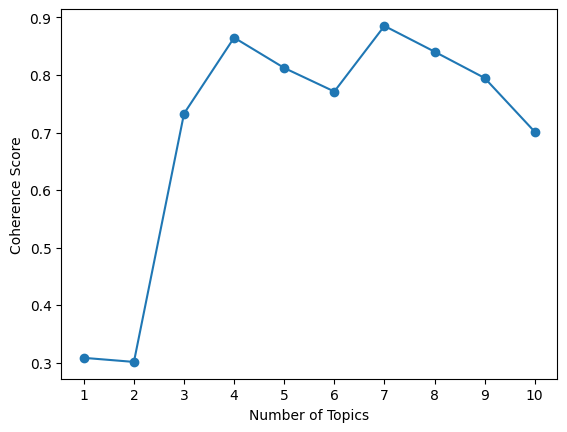

In [36]:
# plot coherence scores

num_topics = range(1, len(coherence_scores) + 1)
plt.plot(num_topics, coherence_scores, marker='o')

# Adding labels and title
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.xticks(num_topics)

plt.show()

# Visualize the Topics

In [37]:
lda_model = LdaModel(corpus, num_topics=4, id2word=id2word, passes=15)


In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.084730 -0.075050       1        1  50.952182
2      0.036859  0.103176       2        1  25.160371
1     -0.119453 -0.021276       3        1  23.272243
3     -0.002136 -0.006850       4        1   0.615204, topic_info=        Term      Freq     Total Category  logprob  loglift
61       tea  2.000000  2.000000  Default  30.0000  30.0000
77     night  2.000000  2.000000  Default  29.0000  29.0000
19   morning  3.000000  3.000000  Default  28.0000  28.0000
87     sleep  1.000000  1.000000  Default  27.0000  27.0000
7     coffee  2.000000  2.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
31       sip  0.008228  1.770016   Topic4  -4.7781  -0.2802
111  routine  0.008228  1.921747   Topic4  -4.7782  -0.3625
10       cup  0.008227  1.770020   Topic4  -4.7782  -0.2803
29     sense  0.008227  2.343478   Topic4  -4.7782  -0.5610
13     enter  0.008227  1.750468   Topic4  -4.7783  -0.2693

[210 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
93        1  0.835764     activity
94        1  0.835739        ahead
37        1  0.564956          air
37        2  0.564956          air
95        1  0.835772        align
...     ...       ...          ...
63        2  0.956913  tranquility
36        1  0.835706         vein
64        2  0.956907       warmth
91        3  0.975153    wellbeing
92        3  0.975152        world

[126 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

- Each bubble represents a topic
- The larger the bubble, the higher percentage of the number of documents in the corpus is about that topic
- Blue bars represent the frequency of each word in the corpus
- Red bars give the estimated number of times a term was generated by a given topic
- The further the bubbles (topics) are away from each other, the more different they are



# Your Turn!

Upload the data I sent you, or upload your own data (can be done on the left side under "Files")

In [69]:
folder_path = 'data/'

documents = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as file:
        doc = file.read()
        documents.append(doc)

In [70]:
documents

['Digital humanities (DH) is an area of scholarly activity at the intersection of computing or digital technologies \nand the disciplines of the humanities. It includes the systematic use of digital resources in the humanities, \nas well as the analysis of their application.[1][2] DH can be defined as new ways of doing scholarship that \ninvolve collaborative, transdisciplinary, and computationally engaged research, teaching, and publishing.[3] \nIt brings digital tools and methods to the study of the humanities with the recognition that the printed word \nis no longer the main medium for knowledge production and distribution.[3]\nBy producing and using new applications and techniques, DH makes new kinds of teaching possible, while at \nthe same time studying and critiquing how these impact cultural heritage and digital culture.[2] DH is also \napplied in research. Thus, a distinctive feature of DH is its cultivation of a two-way relationship between \nthe humanities and the digital: t

# 1) Preprocessing

In [71]:
preprocessed_documents = preprocess_english(documents)
preprocessed_documents

[['digital',
  'humanity',
  'dh',
  'area',
  'scholarly',
  'activity',
  'intersection',
  'compute',
  'digital',
  'technology',
  'discipline',
  'humanity',
  'include',
  'systematic',
  'use',
  'digital',
  'resource',
  'humanity',
  'well',
  'analysis',
  'application',
  'dh',
  'define',
  'new',
  'way',
  'scholarship',
  'involve',
  'collaborative',
  'transdisciplinary',
  'computationally',
  'engage',
  'research',
  'teaching',
  'publishing',
  'bring',
  'digital',
  'tool',
  'method',
  'study',
  'humanity',
  'recognition',
  'print',
  'word',
  'long',
  'main',
  'medium',
  'knowledge',
  'production',
  'distribution',
  'produce',
  'use',
  'new',
  'application',
  'technique',
  'dh',
  'make',
  'new',
  'kind',
  'teach',
  'possible',
  'time',
  'study',
  'critique',
  'impact',
  'cultural',
  'heritage',
  'digital',
  'culture',
  'dh',
  'also',
  'apply',
  'research',
  'thus',
  'distinctive',
  'feature',
  'dh',
  'cultivation',
  'tw

# 2) LDA Model

In [72]:
id2word = corpora.Dictionary(preprocessed_documents)
corpus = [id2word.doc2bow(text) for text in preprocessed_documents]

In [73]:
lda_model = LdaModel(corpus, num_topics=5, id2word=id2word, passes=15, random_state=1)

In [74]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.061*"language" + 0.014*"human" + 0.013*"use" + 0.010*"social" + 0.010*"system"')
(1, '0.017*"ai" + 0.013*"humanity" + 0.013*"microsoft" + 0.010*"language" + 0.010*"study"')
(2, '0.047*"digital" + 0.035*"humanity" + 0.013*"field" + 0.013*"study" + 0.010*"dh"')
(3, '0.031*"language" + 0.021*"linguistic" + 0.014*"study" + 0.011*"knowledge" + 0.010*"ai"')
(4, '0.061*"intelligence" + 0.020*"theory" + 0.015*"iq" + 0.013*"test" + 0.013*"individual"')


In [75]:
for id, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)

    # Sort topics by probability in descending order
    doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)

    # Print the document id and the dominant topics
    print("\n")
    print(f"Document {id + 1}:")
    print("\n")
    for topic, prob in doc_topics:
        print(f"Topic {topic}: Probability {prob}, \n {topics[topic][1]}")
        #print("\n")



Document 1:


Topic 2: Probability 0.9981434345245361, 
 0.047*"digital" + 0.035*"humanity" + 0.013*"field" + 0.013*"study" + 0.010*"dh"


Document 2:


Topic 3: Probability 0.9992031455039978, 
 0.031*"language" + 0.021*"linguistic" + 0.014*"study" + 0.011*"knowledge" + 0.010*"ai"


Document 3:


Topic 0: Probability 0.9978558421134949, 
 0.061*"language" + 0.014*"human" + 0.013*"use" + 0.010*"social" + 0.010*"system"


Document 4:


Topic 1: Probability 0.9972884654998779, 
 0.017*"ai" + 0.013*"humanity" + 0.013*"microsoft" + 0.010*"language" + 0.010*"study"


Document 5:


Topic 1: Probability 0.9964922666549683, 
 0.017*"ai" + 0.013*"humanity" + 0.013*"microsoft" + 0.010*"language" + 0.010*"study"


Document 6:


Topic 3: Probability 0.998895525932312, 
 0.031*"language" + 0.021*"linguistic" + 0.014*"study" + 0.011*"knowledge" + 0.010*"ai"


Document 7:


Topic 4: Probability 0.9983711838722229, 
 0.061*"intelligence" + 0.020*"theory" + 0.015*"iq" + 0.013*"test" + 0.013*"individu

In [76]:
# Specify the number of top topics to display
num_top_topics = 3  # Adjust this value as needed

for id, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)

    # Sort topics by probability in descending order
    doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)

    # Print the document id and the top topics
    print(f"Document {id + 1}:")
    for i, (topic, prob) in enumerate(doc_topics[:num_top_topics]):
        print(f"Topic {i + 1}: Topic {topic}, Probability {prob}")
        print(topics[topic][1])  # Print topic words or description
        print("\n")


Document 1:
Topic 1: Topic 2, Probability 0.9981434345245361
0.047*"digital" + 0.035*"humanity" + 0.013*"field" + 0.013*"study" + 0.010*"dh"


Document 2:
Topic 1: Topic 3, Probability 0.9992032647132874
0.031*"language" + 0.021*"linguistic" + 0.014*"study" + 0.011*"knowledge" + 0.010*"ai"


Document 3:
Topic 1: Topic 0, Probability 0.9978557825088501
0.061*"language" + 0.014*"human" + 0.013*"use" + 0.010*"social" + 0.010*"system"


Document 4:
Topic 1: Topic 1, Probability 0.9972884654998779
0.017*"ai" + 0.013*"humanity" + 0.013*"microsoft" + 0.010*"language" + 0.010*"study"


Document 5:
Topic 1: Topic 1, Probability 0.996491551399231
0.017*"ai" + 0.013*"humanity" + 0.013*"microsoft" + 0.010*"language" + 0.010*"study"


Document 6:
Topic 1: Topic 3, Probability 0.998895525932312
0.031*"language" + 0.021*"linguistic" + 0.014*"study" + 0.011*"knowledge" + 0.010*"ai"


Document 7:
Topic 1: Topic 4, Probability 0.9983711838722229
0.061*"intelligence" + 0.020*"theory" + 0.015*"iq" + 0.013

In [77]:
documents[0]

'Digital humanities (DH) is an area of scholarly activity at the intersection of computing or digital technologies \nand the disciplines of the humanities. It includes the systematic use of digital resources in the humanities, \nas well as the analysis of their application.[1][2] DH can be defined as new ways of doing scholarship that \ninvolve collaborative, transdisciplinary, and computationally engaged research, teaching, and publishing.[3] \nIt brings digital tools and methods to the study of the humanities with the recognition that the printed word \nis no longer the main medium for knowledge production and distribution.[3]\nBy producing and using new applications and techniques, DH makes new kinds of teaching possible, while at \nthe same time studying and critiquing how these impact cultural heritage and digital culture.[2] DH is also \napplied in research. Thus, a distinctive feature of DH is its cultivation of a two-way relationship between \nthe humanities and the digital: th

# 3) Plot Coherence Scores

In [78]:
coherence_scores = calculate_coherence_scores(corpus, id2word, preprocessed_documents, max_topics=10)
coherence_scores

[0.21658607989415665,
 0.28657359762373663,
 0.38790070274201144,
 0.297075024110046,
 0.32573475676338015,
 0.3210381867077738,
 0.30834887787359555,
 0.316741830500208,
 0.3247695639275221,
 0.3266140789640716]

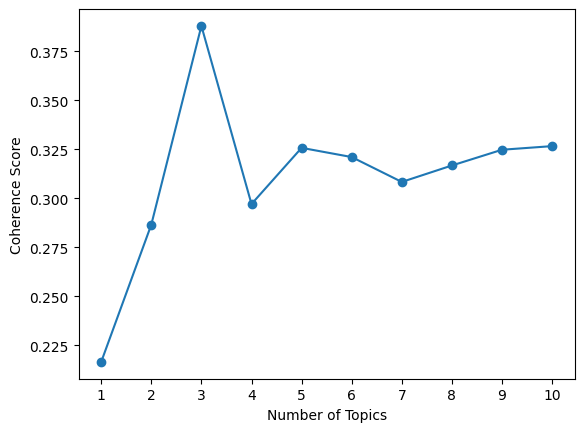

In [79]:
# plot coherence scores

num_topics = range(1, len(coherence_scores) + 1)
plt.plot(num_topics, coherence_scores, marker='o')

# Adding labels and title
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.xticks(num_topics)

plt.show()

# 4) Visualize Topics

In [84]:
lda_model = LdaModel(corpus, num_topics=3, id2word=id2word, passes=15, random_state=1)

In [85]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.060919  0.102448       1        1  40.518758
0     -0.134394 -0.006188       2        1  31.015474
1      0.073474 -0.096260       3        1  28.465768, topic_info=             Term       Freq      Total Category  logprob  loglift
128      language  81.000000  81.000000  Default  30.0000  30.0000
466  intelligence  44.000000  44.000000  Default  29.0000  29.0000
135    linguistic  36.000000  36.000000  Default  28.0000  28.0000
72        digital  26.000000  26.000000  Default  27.0000  27.0000
127     knowledge  18.000000  18.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
224         study   6.442206  35.534033   Topic3  -5.0615  -0.4512
213        social   4.396836  12.935494   Topic3  -5.4435   0.1774
253           use   5.097786  25.087417   Topic3  -5.2956  -0.3371
115       include   4.406302  14.622748   Topic3  -5.4414   0.0569
128      language   6.344828  81.156706   Topic3  -5.0768  -1.2923

[185 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1055      2  0.835558  abstract
712       2  0.928843   acquire
269       1  0.959416    action
276       1  0.944330     agent
277       1  0.615833        ai
...     ...       ...       ...
262       2  0.621939      word
710       1  0.138843     write
710       2  0.694215     write
710       3  0.138843     write
859       2  0.695787      year

[219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

Let's see how the plot differs if we search for 4 topics

In [86]:
lda_model = LdaModel(corpus, num_topics=4, id2word=id2word, passes=15, random_state=1)

In [87]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.052237 -0.093501       1        1  60.910540
1     -0.078014  0.113555       2        1  14.718463
2      0.142544  0.024078       3        1  13.851137
0     -0.012293 -0.044131       4        1  10.519861, topic_info=             Term       Freq      Total Category  logprob  loglift
128      language  82.000000  82.000000  Default  30.0000  30.0000
466  intelligence  41.000000  41.000000  Default  29.0000  29.0000
277            ai  25.000000  25.000000  Default  28.0000  28.0000
238        theory  13.000000  13.000000  Default  27.0000  27.0000
449         human  24.000000  24.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
153       natural   1.197540   5.802332   Topic4  -5.7487   0.6739
328       century   1.197382   6.926249   Topic4  -5.7488   0.4967
166    philosophy   1.197280   5.802998   Topic4  -5.7489   0.6736
508          mean   1.197246   6.926191   Topic4  -5.7490   0.4966
208           set   1.197222   6.925567   Topic4  -5.7490   0.4967

[250 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
264       1  0.495591  ability
264       3  0.165197  ability
264       4  0.330394  ability
1177      3  0.539475  achieve
712       1  0.501826  acquire
...     ...       ...      ...
710       1  0.694161    write
710       2  0.138832    write
710       4  0.277665    write
859       1  0.386768     year
859       4  0.386768     year

[332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

You can see that there is some overlap between topic 1 and 4 now! This means that the two topics are not perfectly separated

# ...Already finished? Download some additional texts from the internet and apply topic modelling on them.

 You can use wikipedia texts, whole books from https://www.gutenberg.org/about/, or texts from any other webpage that is interesting to you. You can also use texts from your own research!